# $D_{s1}(2460)^+\to D_s^+\gamma$ production study
## Trigger efficiencies
### Data analysis and MC analysis
#### Trigger efficiencies over MC

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [1]:
import ROOT
from datetime import datetime
import numpy as np
import sys 
import uncertainties as un
import pandas as pd 
from particle import Particle
import matplotlib.pyplot as plt
import os
ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyFit')
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyFit as rpf
import RooPyShort as rsh

print(datetime.now())

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()

%jsroot on

Welcome to JupyROOT 6.28/04
2024-04-01 11:01:21.609905
-------------------------
Set LHCb Style - May 2021
-------------------------


In [2]:
if not os.path.exists("./Graphs"):
    os.makedirs("./Graphs")
else:
    print("Graphs directory already exists")

if not os.path.exists("./root_files"):
    os.makedirs("./root_files")
else:
    print("root_files directory already exists")

Graphs directory already exists
root_files directory already exists


## RDataFrame definition

In [3]:
priv = False
Filt = True

if priv:
    MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Private/'
else:
    if Filt:
        MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Official/TightCut/'
    else:
        MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Official/DecProdCut/'
    
dtt = "DsGammaTuple"
    
tdf_Dsst = ROOT.RDataFrame(dtt+"/DecayTree", MC_path+"DsstDsGamma*.root")
tdf_Dsst = tdf_Dsst.Define("DsgM", "Dsg_M-Ds_M+1969")

tdf_Ds1 = ROOT.RDataFrame(dtt+"/DecayTree", MC_path+"Ds1DsGamma*.root")
tdf_Ds1 = tdf_Ds1.Define("DsgM", "Dsg_M-Ds_M+1969")

## TRUEIDs and MCMatching

In [4]:
TRUEID = rsh.TRUEIDs()
TRUEID_dtt = TRUEID[dtt]

TRUEID_Dsst = TRUEID_dtt["DsstDsGamma"]
TRUEID_Ds1 = TRUEID_dtt["Ds1DsGamma"]

tdf_Dsst_sig = tdf_Dsst.Filter(TRUEID_Dsst)
tdf_Ds1_sig = tdf_Ds1.Filter(TRUEID_Ds1)

## Selection and Trigger

In [5]:
TRUEID = rsh.TRUEIDs()
TRUEID_dtt = TRUEID[dtt]
TRUEID_Ds1 = TRUEID_dtt["Ds1DsGamma"]

off_sel  = "gamma_PT > 1200 && gamma_CL > 0.7 && abs(Ds_M-1969) < 20"
nPVs_req = "nPVs == 1"

L0_cond    = "(Ds_L0HadronDecision_TOS == 1 | Dsg_L0Global_TIS == 1)"
HLT1_cond  = "(Ds_Hlt1TrackMVADecision_TOS == 1 | Ds_Hlt1TwoTrackMVADecision_TOS == 1)"
HLT2_cond  = "(Ds_Hlt2CharmHadDspToKmKpPipDecision_TOS == 1)"
trig_conds = "{0} && {1} && {2}".format(L0_cond, HLT1_cond, HLT2_cond) 

MC_sel = "{0} && {1}".format(off_sel, nPVs_req)

Dsst_window = "DsgM > 2050 && DsgM < 2250"
Ds1_window = "DsgM > 2350 && DsgM < 2600"

tdf_Dsst_sig_sel = tdf_Dsst_sig.Filter("{0} && {1}".format(MC_sel, Dsst_window))
tdf_Ds1_sig_sel  = tdf_Ds1_sig.Filter("{0} && {1}".format(MC_sel, Ds1_window))

tdf_Dsst_sig_sel_trig = tdf_Dsst_sig.Filter("{0} && {1} && {2}".format(MC_sel, Dsst_window, trig_conds))
tdf_Ds1_sig_sel_trig  = tdf_Ds1_sig.Filter("{0} && {1} && {2}".format(MC_sel, Ds1_window, trig_conds))

## TIS and TOS conditions

In [6]:
TIS = "(Dsg_L0Global_TIS == 1)"
TOS = "(Ds_L0HadronDecision_TOS == 1)"
TISTOS = "{0} && {1}".format(TIS, TOS)

TIS_TOS_conds = [trig_conds, TIS, TOS, TISTOS]

tdf_Dsst_sig_sel_TIS_TOS = [tdf_Dsst_sig_sel.Filter(cond) for cond in TIS_TOS_conds] 
tdf_Ds1_sig_sel_TIS_TOS  = [tdf_Ds1_sig_sel.Filter(cond) for cond in TIS_TOS_conds]  

tdf_Dsst_sig_sel_trig_TIS_TOS = [tdf_Dsst_sig_sel_trig.Filter(cond) for cond in TIS_TOS_conds] 
tdf_Ds1_sig_sel_trig_TIS_TOS  = [tdf_Ds1_sig_sel_trig.Filter(cond) for cond in TIS_TOS_conds]  

In [7]:
mass_sel_trig_Dsst = tdf_Dsst_sig_sel_trig.Histo1D((("","",100,2050,2250)), "DsgM")
mass_sel_trig_Ds1 = tdf_Ds1_sig_sel_trig.Histo1D((("","",100,2350,2600)), "DsgM")

mass_sel_trig_Dsst_TIS_TOS = [x.Histo1D(("","",100,2050,2250), "DsgM") for x in tdf_Dsst_sig_sel_trig_TIS_TOS]
mass_sel_trig_Ds1_TIS_TOS  = [x.Histo1D(("","",100,2350,2600), "DsgM") for x in tdf_Ds1_sig_sel_trig_TIS_TOS]

In [8]:
colors = [1, 3, 5, 6]
mass_label = "#it{M(D_{s}^{+}#gamma)} [MeV/c^{2}]"

c1 = ROOT.TCanvas("", "", 800, 600)
lgd1 = ROOT.TLegend(0.49, 0.59, 0.89, 0.89)
lgd2 = ROOT.TLegend(0.49, 0.59, 0.89, 0.89)
c1.Divide(2, 1)
c1.cd(1)
rsh.TH1D_plot(mass_sel_trig_Dsst, color=2, xlabel=mass_label)
for i in range(len(colors)):
    rsh.TH1D_plot(mass_sel_trig_Dsst_TIS_TOS[i], color=colors[i], xlabel=mass_label)
rsh.legend_plot(lgd1, [mass_sel_trig_Dsst.GetPtr()]+[hist.GetPtr() for hist in mass_sel_trig_Dsst_TIS_TOS],
                ["sel", "sel+trig", "sel+TIS", "sel+TOS", "sel+(TIS&TOS)"], ["l","l","l","l","l"])
c1.cd(2)
rsh.TH1D_plot(mass_sel_trig_Ds1, color=4, xlabel=mass_label)
for i in range(len(colors)):
    rsh.TH1D_plot(mass_sel_trig_Ds1_TIS_TOS[i], color=colors[i], xlabel=mass_label)
rsh.legend_plot(lgd2, [mass_sel_trig_Ds1.GetPtr()]+[hist.GetPtr() for hist in mass_sel_trig_Ds1_TIS_TOS],
                ["sel", "sel+trig", "sel+TIS", "sel+TOS", "sel+(TIS&TOS)"], ["l","l","l","l","l"])
c1.Draw()
#c1.SaveAs("Graphs/Exp_MagD18_DsgL_mass_des_trig_TISTOS.pdf")

### Full spectrum

In [9]:
tdf_Dsst_sel_trig = tdf_Dsst.Filter("{0} && {1}".format(MC_sel, trig_conds))
tdf_Ds1_sel_trig  = tdf_Ds1.Filter("{0} && {1}".format(MC_sel, trig_conds))

In [10]:
Nbins = 50

mass_Dsst_sel_trig = tdf_Dsst_sel_trig.Histo1D(("","",Nbins,2050,3200), "DsgM")
mass_Dsst_sel_trig_TIS = tdf_Dsst_sel_trig.Filter(TIS).Histo1D(("","",Nbins,2050,3200), "DsgM")
mass_Dsst_sel_trig_TOS = tdf_Dsst_sel_trig.Filter(TOS).Histo1D(("","",Nbins,2050,3200), "DsgM")
mass_Dsst_sel_trig_TISTOS = tdf_Dsst_sel_trig.Filter(TISTOS).Histo1D(("","",Nbins,2050,3200), "DsgM")

mass_Ds1_sel_trig = tdf_Ds1_sel_trig.Histo1D(("","",Nbins,2050,3200), "DsgM")
mass_Ds1_sel_trig_TIS = tdf_Ds1_sel_trig.Filter(TIS).Histo1D(("","",Nbins,2050,3200), "DsgM")
mass_Ds1_sel_trig_TOS = tdf_Ds1_sel_trig.Filter(TOS).Histo1D(("","",Nbins,2050,3200), "DsgM")
mass_Ds1_sel_trig_TISTOS = tdf_Ds1_sel_trig.Filter(TISTOS).Histo1D(("","",Nbins,2050,3200), "DsgM")

In [11]:
def efficiencies(N1, N2, uN1, uN2):
    eff = N1 / N2
    ueff = eff * np.sqrt((uN1/N1)**2 + (uN2/N2)**2)
    return eff, ueff

def eff_trigger(N1, N2, N3, N4, uN1, uN2, uN3, uN4):
    eff_trig = N1 * N2 / (N3 * N4)
    ueff_trig = eff_trig * np.sqrt((uN1/N1)**2 + (uN2/N2)**2 + (uN3/N3)**2 + (uN4/N4)**2)
    return eff_trig, ueff_trig

eff_TIS_Dsst  = ROOT.TH1D("", "", Nbins, 2050, 3200); eff_TIS_Ds1  = ROOT.TH1D("", "", Nbins, 2050, 3200)
eff_TOS_Dsst  = ROOT.TH1D("", "", Nbins, 2050, 3200); eff_TOS_Ds1  = ROOT.TH1D("", "", Nbins, 2050, 3200)
eff_trig_Dsst = ROOT.TH1D("", "", Nbins, 2050, 3200); eff_trig_Ds1 = ROOT.TH1D("", "", Nbins, 2050, 3200)

for i in range(1, Nbins+1):
    N_ST_Dsst = mass_Dsst_sel_trig.GetBinContent(i)
    NTIS_Dsst = mass_Dsst_sel_trig_TIS.GetBinContent(i)
    NTOS_Dsst = mass_Dsst_sel_trig_TOS.GetBinContent(i)
    NTISTOS_Dsst = mass_Dsst_sel_trig_TISTOS.GetBinContent(i)

    if NTIS_Dsst != 0 and NTOS_Dsst != 0 and NTISTOS_Dsst != 0:
        eff_TIS_Dsst.SetBinContent(i, (efficiencies(NTISTOS_Dsst, NTOS_Dsst, 
                                                    np.sqrt(NTISTOS_Dsst), np.sqrt(NTOS_Dsst)))[0])
        eff_TIS_Dsst.SetBinError(i, (efficiencies(NTISTOS_Dsst, NTOS_Dsst, 
                                                  np.sqrt(NTISTOS_Dsst), np.sqrt(NTOS_Dsst)))[1])
        
        eff_TOS_Dsst.SetBinContent(i, (efficiencies(NTISTOS_Dsst, NTIS_Dsst, 
                                                    np.sqrt(NTISTOS_Dsst), np.sqrt(NTIS_Dsst)))[0])
        eff_TOS_Dsst.SetBinError(i, (efficiencies(NTISTOS_Dsst, NTIS_Dsst, 
                                                  np.sqrt(NTISTOS_Dsst), np.sqrt(NTIS_Dsst)))[1])
        
        eff_trig_Dsst.SetBinContent(i, (eff_trigger(N_ST_Dsst, NTISTOS_Dsst, NTIS_Dsst, NTOS_Dsst, 
                                               np.sqrt(N_ST_Dsst), np.sqrt(NTISTOS_Dsst), 
                                               np.sqrt(NTIS_Dsst), np.sqrt(NTOS_Dsst)))[0])
        eff_trig_Dsst.SetBinError(i, (eff_trigger(N_ST_Dsst, NTISTOS_Dsst, NTIS_Dsst, NTOS_Dsst, 
                                             np.sqrt(N_ST_Dsst), np.sqrt(NTISTOS_Dsst), 
                                             np.sqrt(NTIS_Dsst), np.sqrt(NTOS_Dsst)))[1])
    else:
        eff_TIS_Dsst.SetBinContent(i, 0)
        eff_TIS_Dsst.SetBinError(i, 0)
        
        eff_TOS_Dsst.SetBinContent(i, 0)
        eff_TOS_Dsst.SetBinError(i, 0)
        
        eff_trig_Dsst.SetBinContent(i, 0)
        eff_trig_Dsst.SetBinError(i, 0)
        
    N_ST_Ds1 = mass_Ds1_sel_trig.GetBinContent(i)
    NTIS_Ds1 = mass_Ds1_sel_trig_TIS.GetBinContent(i)
    NTOS_Ds1 = mass_Ds1_sel_trig_TOS.GetBinContent(i)
    NTISTOS_Ds1 = mass_Ds1_sel_trig_TISTOS.GetBinContent(i)
    
    if NTIS_Ds1 != 0 and NTOS_Ds1 != 0 and NTISTOS_Ds1 != 0:
        eff_TIS_Ds1.SetBinContent(i, (efficiencies(NTISTOS_Ds1, NTOS_Ds1, 
                                                    np.sqrt(NTISTOS_Ds1), np.sqrt(NTOS_Ds1)))[0])
        eff_TIS_Ds1.SetBinError(i, (efficiencies(NTISTOS_Ds1, NTOS_Ds1, 
                                                  np.sqrt(NTISTOS_Ds1), np.sqrt(NTOS_Ds1)))[1])
        
        eff_TOS_Ds1.SetBinContent(i, (efficiencies(NTISTOS_Ds1, NTIS_Ds1, 
                                                    np.sqrt(NTISTOS_Ds1), np.sqrt(NTIS_Ds1)))[0])
        eff_TOS_Ds1.SetBinError(i, (efficiencies(NTISTOS_Ds1, NTIS_Ds1, 
                                                  np.sqrt(NTISTOS_Ds1), np.sqrt(NTIS_Ds1)))[1])
        
        eff_trig_Ds1.SetBinContent(i, (eff_trigger(N_ST_Ds1, NTISTOS_Ds1, NTIS_Ds1, NTOS_Ds1, 
                                               np.sqrt(N_ST_Ds1), np.sqrt(NTISTOS_Ds1), 
                                               np.sqrt(NTIS_Ds1), np.sqrt(NTOS_Ds1)))[0])
        eff_trig_Ds1.SetBinError(i, (eff_trigger(N_ST_Ds1, NTISTOS_Ds1, NTIS_Ds1, NTOS_Ds1, 
                                             np.sqrt(N_ST_Ds1), np.sqrt(NTISTOS_Ds1), 
                                             np.sqrt(NTIS_Ds1), np.sqrt(NTOS_Ds1)))[1])
    else:
        eff_TIS_Ds1.SetBinContent(i, 0)
        eff_TIS_Ds1.SetBinError(i, 0)
        
        eff_TOS_Ds1.SetBinContent(i, 0)
        eff_TOS_Ds1.SetBinError(i, 0)
        
        eff_trig_Ds1.SetBinContent(i, 0)
        eff_trig_Ds1.SetBinError(i, 0)

In [12]:
mass_label = "#it{M(D_{s}^{+}#gamma)} [MeV/c^{2}]"

c1 = ROOT.TCanvas("", "", 1400, 800)
c1.Divide(2, 1)
lgd1 = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
lgd2 = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
c1.cd(1)
rsh.TH1D_plot(eff_TOS_Dsst, color=2, xlabel=mass_label, ylabel="Efficiency")
rsh.TH1D_plot(eff_TIS_Dsst, color=1, xlabel=mass_label, ylabel="Efficiency")
rsh.TH1D_plot(eff_trig_Dsst, color=4, xlabel=mass_label, ylabel="Efficiency")
rsh.legend_plot(lgd1, [eff_TOS_Dsst, eff_TIS_Dsst, eff_trig_Dsst], 
                ["#varepsilon_{L0,TOS}", "#varepsilon_{L0,TIS}", "#varepsilon_{trig}"], 
                ["l", "l", "l"])
c1.cd(2)
rsh.TH1D_plot(eff_TOS_Ds1, color=2, xlabel=mass_label, ylabel="Efficiency")
rsh.TH1D_plot(eff_TIS_Ds1, color=1, xlabel=mass_label, ylabel="Efficiency")
rsh.TH1D_plot(eff_trig_Ds1, color=4, xlabel=mass_label, ylabel="Efficiency")
rsh.legend_plot(lgd2, [eff_TOS_Ds1, eff_TIS_Ds1, eff_trig_Ds1], 
                ["#varepsilon_{L0,TOS}", "#varepsilon_{L0,TIS}", "#varepsilon_{trig}"], 
                ["l", "l", "l"])
c1.Draw()
c1.SaveAs("Graphs/Sim_DsgL_eff_TISTOS_vs_mass.pdf")

Info in <TCanvas::Print>: pdf file Graphs/Sim_DsgL_eff_TISTOS_vs_mass.pdf has been created


### $\mathrm{N_{Tracks}^{VELO}}$ intervals



In [13]:
nVelo_intervals = [[6.00, 55.00], [55.00, 73.00], [73.00, 89.00], [89.00, 110.00], [110.00, 325.00]]

nVelo_cuts = ["nVeloTracks > {0} && nVeloTracks <= {1}".format(inter[0], inter[1]) for inter in nVelo_intervals]

tdf_Dsst_sig_sel_Velo = [tdf_Dsst_sig_sel.Filter(cut) for cut in nVelo_cuts]
tdf_Ds1_sig_sel_Velo  = [tdf_Ds1_sig_sel.Filter(cut) for cut in nVelo_cuts]

tdf_Dsst_sig_sel_trig_Velo = [tdf_Dsst_sig_sel_trig.Filter(cut) for cut in nVelo_cuts]
tdf_Ds1_sig_sel_trig_Velo  = [tdf_Ds1_sig_sel_trig.Filter(cut) for cut in nVelo_cuts]

In [14]:
histo_Dsst_sel_Velo        = [tdf.Histo1D(("", "", 100, 2050, 2250), "DsgM") for tdf in tdf_Dsst_sig_sel_Velo]
histo_Dsst_sel_trig_Velo   = [tdf.Filter(trig_conds).Histo1D(("", "", 100, 2050, 2250), "DsgM") for tdf in tdf_Dsst_sig_sel_Velo]
histo_Dsst_sel_TIS_Velo    = [tdf.Filter(TIS).Histo1D(("", "", 100, 2050, 2250), "DsgM") for tdf in tdf_Dsst_sig_sel_Velo]
histo_Dsst_sel_TOS_Velo    = [tdf.Filter(TOS).Histo1D(("", "", 100, 2050, 2250), "DsgM") for tdf in tdf_Dsst_sig_sel_Velo]
histo_Dsst_sel_TISTOS_Velo = [tdf.Filter(TISTOS).Histo1D(("", "", 100, 2050, 2250), "DsgM") for tdf in tdf_Dsst_sig_sel_Velo]

histo_Ds1_sel_Velo        = [tdf.Histo1D(("", "", 100, 2350, 2600), "DsgM") for tdf in tdf_Ds1_sig_sel_Velo]
histo_Ds1_sel_trig_Velo   = [tdf.Filter(trig_conds).Histo1D(("", "", 100, 2350, 2600), "DsgM") for tdf in tdf_Ds1_sig_sel_Velo]
histo_Ds1_sel_TIS_Velo    = [tdf.Filter(TIS).Histo1D(("", "", 100, 2350, 2600), "DsgM") for tdf in tdf_Ds1_sig_sel_Velo]
histo_Ds1_sel_TOS_Velo    = [tdf.Filter(TOS).Histo1D(("", "", 100, 2350, 2600), "DsgM") for tdf in tdf_Ds1_sig_sel_Velo]
histo_Ds1_sel_TISTOS_Velo = [tdf.Filter(TISTOS).Histo1D(("", "", 100, 2350, 2600), "DsgM") for tdf in tdf_Ds1_sig_sel_Velo]

histo_Dsst_sel_trig_Velo        = [tdf.Histo1D(("", "", 100, 2050, 2250), "DsgM") for tdf in tdf_Dsst_sig_sel_trig_Velo]
histo_Dsst_sel_trig_TIS_Velo    = [tdf.Filter(TIS).Histo1D(("", "", 100, 2050, 2250), "DsgM") for tdf in tdf_Dsst_sig_sel_trig_Velo]
histo_Dsst_sel_trig_TOS_Velo    = [tdf.Filter(TOS).Histo1D(("", "", 100, 2050, 2250), "DsgM") for tdf in tdf_Dsst_sig_sel_trig_Velo]
histo_Dsst_sel_trig_TISTOS_Velo = [tdf.Filter(TISTOS).Histo1D(("", "", 100, 2050, 2250), "DsgM") for tdf in tdf_Dsst_sig_sel_trig_Velo]

histo_Ds1_sel_trig_Velo        = [tdf.Histo1D(("", "", 100, 2350, 2600), "DsgM") for tdf in tdf_Ds1_sig_sel_trig_Velo]
histo_Ds1_sel_trig_TIS_Velo    = [tdf.Filter(TIS).Histo1D(("", "", 100, 2350, 2600), "DsgM") for tdf in tdf_Ds1_sig_sel_trig_Velo]
histo_Ds1_sel_trig_TOS_Velo    = [tdf.Filter(TOS).Histo1D(("", "", 100, 2350, 2600), "DsgM") for tdf in tdf_Ds1_sig_sel_trig_Velo]
histo_Ds1_sel_trig_TISTOS_Velo = [tdf.Filter(TISTOS).Histo1D(("", "", 100, 2350, 2600), "DsgM") for tdf in tdf_Ds1_sig_sel_trig_Velo]

In [15]:
NDsst_sel_Velo = np.array([hist.Integral() for hist in histo_Dsst_sel_Velo])
NDsst_sel_trig_Velo = np.array([hist.Integral() for hist in histo_Dsst_sel_trig_Velo])
NDsst_sel_TIS_Velo = np.array([hist.Integral() for hist in histo_Dsst_sel_TIS_Velo])
NDsst_sel_TOS_Velo = np.array([hist.Integral() for hist in histo_Dsst_sel_TOS_Velo])
NDsst_sel_TISTOS_Velo = np.array([hist.Integral() for hist in histo_Dsst_sel_TISTOS_Velo])

NDs1_sel_Velo = np.array([hist.Integral() for hist in histo_Ds1_sel_Velo])
NDs1_sel_trig_Velo = np.array([hist.Integral() for hist in histo_Ds1_sel_trig_Velo])
NDs1_sel_TIS_Velo = np.array([hist.Integral() for hist in histo_Ds1_sel_TIS_Velo])
NDs1_sel_TOS_Velo = np.array([hist.Integral() for hist in histo_Ds1_sel_TOS_Velo])
NDs1_sel_TISTOS_Velo = np.array([hist.Integral() for hist in histo_Ds1_sel_TISTOS_Velo])

NDsst_sel_trig_Velo = np.array([hist.Integral() for hist in histo_Dsst_sel_trig_Velo])
NDsst_sel_trig_TIS_Velo = np.array([hist.Integral() for hist in histo_Dsst_sel_trig_TIS_Velo])
NDsst_sel_trig_TOS_Velo = np.array([hist.Integral() for hist in histo_Dsst_sel_trig_TOS_Velo])
NDsst_sel_trig_TISTOS_Velo = np.array([hist.Integral() for hist in histo_Dsst_sel_trig_TISTOS_Velo])

NDs1_sel_trig_Velo = np.array([hist.Integral() for hist in histo_Ds1_sel_trig_Velo])
NDs1_sel_trig_TIS_Velo = np.array([hist.Integral() for hist in histo_Ds1_sel_trig_TIS_Velo])
NDs1_sel_trig_TOS_Velo = np.array([hist.Integral() for hist in histo_Ds1_sel_trig_TOS_Velo])
NDs1_sel_trig_TISTOS_Velo = np.array([hist.Integral() for hist in histo_Ds1_sel_trig_TISTOS_Velo])

In [16]:
def ueff(eff, N):
    num = eff * (1 - eff)
    ueff = np.sqrt(num/N)
    return ueff

duda = True

if duda: 
    eff_Dsst_TIS_Velo = NDsst_sel_TISTOS_Velo / NDsst_sel_TOS_Velo
    ueff_Dsst_TIS_Velo = ueff(eff_Dsst_TIS_Velo, NDsst_sel_TOS_Velo)

    eff_Dsst_TOS_Velo = NDsst_sel_TISTOS_Velo / NDsst_sel_TIS_Velo
    ueff_Dsst_TOS_Velo = ueff(eff_Dsst_TIS_Velo, NDsst_sel_TIS_Velo)

    eff_Ds1_TIS_Velo = NDs1_sel_TISTOS_Velo / NDs1_sel_TOS_Velo
    ueff_Ds1_TIS_Velo = ueff(eff_Ds1_TIS_Velo, NDs1_sel_TOS_Velo)

    eff_Ds1_TOS_Velo = NDs1_sel_TISTOS_Velo / NDs1_sel_TIS_Velo
    ueff_Ds1_TOS_Velo = ueff(eff_Ds1_TIS_Velo, NDs1_sel_TIS_Velo)
    
else:
    eff_Dsst_TIS_Velo = NDsst_sel_trig_TISTOS_Velo / NDsst_sel_trig_TOS_Velo
    ueff_Dsst_TIS_Velo = ueff(eff_Dsst_TIS_Velo, NDsst_sel_TOS_Velo)

    eff_Dsst_TOS_Velo = NDsst_sel_trig_TISTOS_Velo / NDsst_sel_trig_TIS_Velo
    ueff_Dsst_TOS_Velo = ueff(eff_Dsst_TIS_Velo, NDsst_sel_TIS_Velo)

    eff_Ds1_TIS_Velo = NDs1_sel_trig_TISTOS_Velo / NDs1_sel_trig_TOS_Velo
    ueff_Ds1_TIS_Velo = ueff(eff_Ds1_TIS_Velo, NDs1_sel_trig_TOS_Velo)

    eff_Ds1_TOS_Velo = NDs1_sel_trig_TISTOS_Velo / NDs1_sel_trig_TIS_Velo
    ueff_Ds1_TOS_Velo = ueff(eff_Ds1_TIS_Velo, NDs1_sel_trig_TIS_Velo)
    
eff_Dsst_trig_Velo = NDsst_sel_trig_Velo * eff_Dsst_TIS_Velo / NDsst_sel_TIS_Velo
ueff_Dsst_trig_Velo = np.sqrt(NDsst_sel_trig_Velo*(eff_Dsst_TIS_Velo / NDsst_sel_TIS_Velo)**2 +
                             (NDsst_sel_trig_Velo * ueff_Dsst_TIS_Velo / NDsst_sel_TIS_Velo)**2 + 
                              NDsst_sel_TIS_Velo*(NDsst_sel_trig_Velo * eff_Dsst_TIS_Velo / NDsst_sel_TIS_Velo**2)**2)

eff_Ds1_trig_Velo = NDs1_sel_trig_Velo * eff_Ds1_TIS_Velo / NDs1_sel_TIS_Velo
ueff_Ds1_trig_Velo = np.sqrt(NDs1_sel_trig_Velo*(eff_Ds1_TIS_Velo / NDs1_sel_TIS_Velo)**2 +
                            (NDs1_sel_trig_Velo * ueff_Ds1_TIS_Velo / NDs1_sel_TIS_Velo)**2 + 
                            NDs1_sel_TIS_Velo*(NDs1_sel_trig_Velo * eff_Ds1_TIS_Velo / NDs1_sel_TIS_Velo**2)**2)

#### Plots

In [17]:
path = "/home3/ivan.cambon/DsJ_states_production_research/Ds1DsGamma_analysis/Data_Analysis"

Ds1_vals_file = "{0}/Velo_fits/Results/Exp_2018_Dsg_mass_Dsst_ufit_free_vals_str3_5Velo.csv".format(path)
df_Ds1_vals = pd.read_csv(Ds1_vals_file)

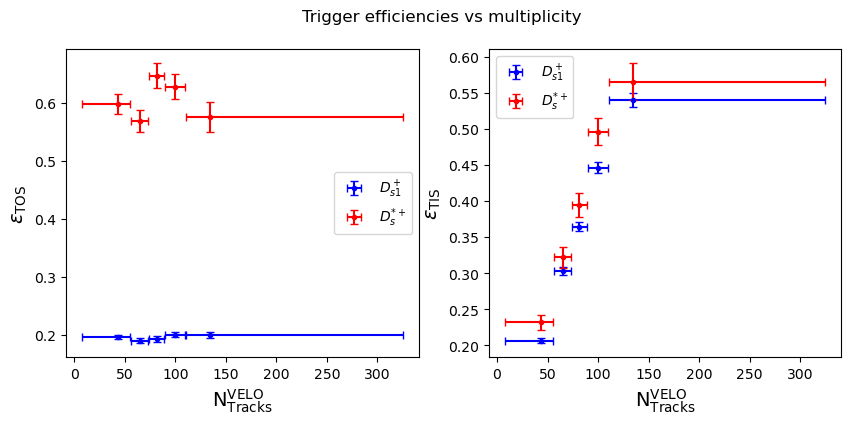

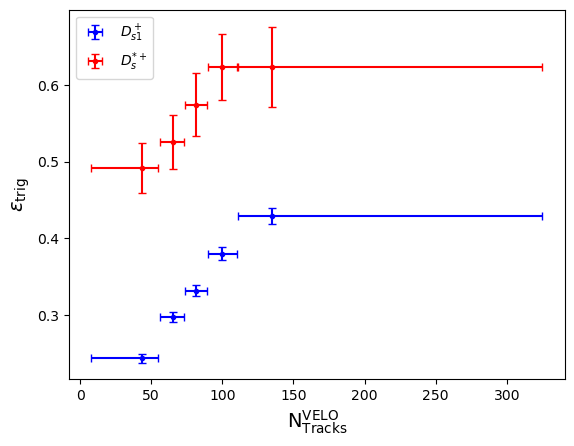

In [18]:
plt.figure(1, figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.errorbar(df_Ds1_vals["nVelo_mean"], eff_Ds1_TOS_Velo, ueff_Ds1_TOS_Velo, 
             xerr=[df_Ds1_vals["nVelo_udown"], df_Ds1_vals["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=3, label=r"$D_{s1}^+$")

plt.errorbar(df_Ds1_vals["nVelo_mean"], eff_Dsst_TOS_Velo, ueff_Dsst_TOS_Velo, 
             xerr=[df_Ds1_vals["nVelo_udown"], df_Ds1_vals["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=3, label=r"$D_{s}^{*+}$")
plt.legend()
plt.ylabel(r"$\varepsilon_{\mathrm{TOS}}$", fontsize=14)
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$", fontsize=14)

plt.subplot(1, 2, 2)
plt.errorbar(df_Ds1_vals["nVelo_mean"], eff_Ds1_TIS_Velo, ueff_Ds1_TIS_Velo, 
             xerr=[df_Ds1_vals["nVelo_udown"], df_Ds1_vals["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=3, label=r"$D_{s1}^+$")

plt.errorbar(df_Ds1_vals["nVelo_mean"], eff_Dsst_TIS_Velo, ueff_Dsst_TIS_Velo, 
             xerr=[df_Ds1_vals["nVelo_udown"], df_Ds1_vals["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=3, label=r"$D_{s}^{*+}$")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$", fontsize=14)
plt.ylabel(r"$\varepsilon_{\mathrm{TIS}}$", fontsize=14)

plt.suptitle("Trigger efficiencies vs multiplicity")
plt.legend()
plt.savefig("Graphs/Sim_Both_DsgL_TIS_and_TOS_effs.pdf", dpi=300, bbox_inches='tight')

plt.figure(2)
plt.errorbar(df_Ds1_vals["nVelo_mean"], eff_Ds1_trig_Velo, ueff_Ds1_trig_Velo, 
             xerr=[df_Ds1_vals["nVelo_udown"], df_Ds1_vals["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=3, label=r"$D_{s1}^+$")

plt.errorbar(df_Ds1_vals["nVelo_mean"], eff_Dsst_trig_Velo, ueff_Dsst_trig_Velo, 
             xerr=[df_Ds1_vals["nVelo_udown"], df_Ds1_vals["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=3, label=r"$D_{s}^{*+}$")
plt.legend()
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$", fontsize=14)
plt.ylabel(r"$\varepsilon_{\mathrm{trig}}$", fontsize=14)
plt.savefig("Graphs/Sim_Both_DsgL_trig_effs.pdf", dpi=300, bbox_inches='tight')


In [19]:
def uratio(a, b, ua, ub):
    ratio = a/b
    uratio = ratio * np.sqrt((ua/a)**2+(ub/b)**2)
    return uratio

eff_TIS_ratio_Velo = eff_Dsst_TIS_Velo / eff_Ds1_TIS_Velo
ueff_TIS_ratio_Velo = uratio(eff_Dsst_TIS_Velo, eff_Ds1_TIS_Velo, ueff_Dsst_TIS_Velo, ueff_Ds1_TIS_Velo)

eff_TOS_ratio_Velo = eff_Dsst_TOS_Velo / eff_Ds1_TOS_Velo
ueff_TOS_ratio_Velo = uratio(eff_Dsst_TOS_Velo, eff_Ds1_TOS_Velo, ueff_Dsst_TOS_Velo, ueff_Ds1_TOS_Velo)

eff_trig_ratio_Velo = eff_Dsst_trig_Velo / eff_Ds1_trig_Velo
ueff_trig_ratio_Velo = uratio(eff_Dsst_trig_Velo, eff_Ds1_trig_Velo, ueff_Dsst_trig_Velo, ueff_Ds1_trig_Velo)

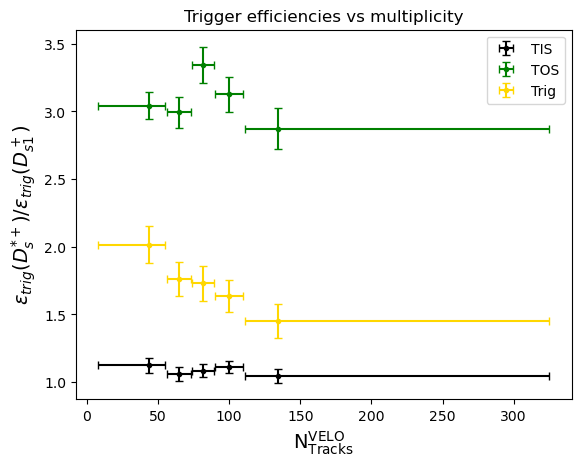

In [20]:
plt.figure(1)
plt.errorbar(df_Ds1_vals["nVelo_mean"], eff_TIS_ratio_Velo, ueff_TIS_ratio_Velo, 
              xerr=[df_Ds1_vals["nVelo_udown"], df_Ds1_vals["nVelo_uup"]], 
              fmt='.', color="black", ecolor="black", capsize=3, label=r"TIS")
plt.errorbar(df_Ds1_vals["nVelo_mean"], eff_TOS_ratio_Velo, ueff_TOS_ratio_Velo, 
              xerr=[df_Ds1_vals["nVelo_udown"], df_Ds1_vals["nVelo_uup"]], 
              fmt='.', color="green", ecolor="green", capsize=3, label=r"TOS")
plt.errorbar(df_Ds1_vals["nVelo_mean"], eff_trig_ratio_Velo, ueff_trig_ratio_Velo, 
              xerr=[df_Ds1_vals["nVelo_udown"], df_Ds1_vals["nVelo_uup"]], 
              fmt='.', color="gold", ecolor="gold", capsize=3, label=r"Trig")
plt.title("Trigger efficiencies vs multiplicity")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$", fontsize=14)
plt.ylabel(r"$\varepsilon_{trig}(D_s^{*+})/\varepsilon_{trig}(D_{s1}^+)$", fontsize=14)
plt.legend()
plt.savefig("Graphs/Sim_Both_DsgL_TIS_and_TOS_effs_ratio.pdf", dpi=300, bbox_inches='tight')